# 4.Variables Cualitativas 

La forma mas sencilla de  resumir las varibales cualitativas es hacer una tabla de contigencia que resuma las distribuciones de frecuencia. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

data= pd.read_csv('/home/inma/Master_Data_Science _Contenido/Fundamentos_de_Analisis _de_Datos/Practica/Datos/Melbourne_housing_FULL.csv')

In [2]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
data.info() #añadimos post code como variable cualitativa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

Podemos observar que 8 de las variables  son cualitativas, pero añadiremos "Postcode" dentro del analisis de las variables cualitativas ya que apesar de estar compuesto por un valor numerico  son datos independientes que debe ser tratados como categorias. 

## 4.1 Resumen Numérico de Variables Cualitativas

### Variable "Suburb" 

Esta variable  hace referencia al barrio donde se encuentra la casa. Procedemos a hacer un analisis de la distribución de densidad y podemos concluir que hay 351 suburbios diferentes. 
 ( podemos agruparlos por zonas pero no tine sentido si hacemos referencia a la localizacion mejor que a esto)

In [4]:
Variables_cualitativas=data[["Suburb","Address","Type","Method","SellerG","Date","CouncilArea","Regionname","Postcode"]]
pd.value_counts(Variables_cualitativas['Suburb'])

Reservoir         844
Bentleigh East    583
Richmond          552
Glen Iris         491
Preston           485
                 ... 
Avonsleigh          1
Wandin North        1
Wildwood            1
Belgrave            1
Kalkallo            1
Name: Suburb, Length: 351, dtype: int64

### Variable "Address"

La variable Address  indica la dirección donde se encuentran las casas. Al realizar el analisis  de distribución por densidad, podemos comprobar que hay direcciones repetidas, esto puede hacer referencia a la dirección de un edificio,  la venta de la misma casa en difrentes fechas o a duplicados. Para ello procedemos a analizar dichas categorias en profundidad. 

In [5]:
Address=pd.value_counts(Variables_cualitativas['Address'])
Address[Address!=1]


5 Charles St       6
25 William St      4
13 George St       3
14 James St        3
21 May St          3
                  ..
20 Butler St       2
15 Lancaster St    2
20 Fawkner St      2
7 Brisbane St      2
2 Celia St         2
Name: Address, Length: 808, dtype: int64

In [6]:
#Analizamos individualmente  las primeras direcciones para ver si si efectivamente son una casa. 
data_aux=data[data.Address == '118 Westgarth St']
print(data_aux)

          Suburb           Address  Rooms Type      Price Method SellerG  \
7454   Northcote  118 Westgarth St      3    h  1500000.0     PI  Jellis   
13335  Northcote  118 Westgarth St      4    h  1822000.0      S  Nelson   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
7454   30/07/2016       5.5    3070.0  ...       1.0  8.0     727.0   
13335  13/05/2017       5.5    3070.0  ...       1.0  8.0     728.0   

       BuildingArea  YearBuilt           CouncilArea Lattitude  Longtitude  \
7454            NaN     1900.0  Darebin City Council  -37.7825    145.0072   
13335           NaN     1900.0  Darebin City Council  -37.7825    145.0072   

                  Regionname Propertycount  
7454   Northern Metropolitan       11364.0  
13335  Northern Metropolitan       11364.0  

[2 rows x 21 columns]


In [7]:
data[data.Address=="118 Westgarth St"]
data_aux.keys()
data_aux["Bedroom2"]

7454     4.0
13335    4.0
Name: Bedroom2, dtype: float64

In [8]:
data[data.Address=="5 Charles St"]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.9944,Northern Metropolitan,4019.0
2289,Brunswick,5 Charles St,3,h,NaN,SP,Nelson,26/07/2016,5.2,3056.0,...,1.0,0.0,179.0,NaN,1900.0,Moreland City Council,-37.77450,144.9634,Northern Metropolitan,11918.0
4575,Glen Iris,5 Charles St,4,h,2010000.0,S,Marshall,10/12/2016,9.2,3146.0,...,2.0,2.0,659.0,212.0,1930.0,Boroondara City Council,-37.85090,145.0916,Southern Metropolitan,10412.0
9907,Sunshine North,5 Charles St,4,h,705000.0,S,Douglas,25/02/2017,13.3,3020.0,...,2.0,1.0,570.0,NaN,NaN,Brimbank City Council,-37.77490,144.8329,Western Metropolitan,4217.0
10018,Surrey Hills,5 Charles St,4,h,NaN,S,Jellis,3/12/2016,11.2,3127.0,...,2.0,2.0,349.0,NaN,NaN,Boroondara City Council,-37.82550,145.1116,Southern Metropolitan,5457.0
25584,Bentleigh East,5 Charles St,3,h,1700000.0,S,Buxton,28/10/2017,13.8,3165.0,...,1.0,2.0,649.0,NaN,NaN,Glen Eira City Council,-37.91725,145.0559,Southern Metropolitan,10969.0


En este caso parece ser que todas son casas diferentes. 

In [9]:
data[data.Address=="25 William St"]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2435,Bulleen,25 William St,4,h,1235000.0,S,Jellis,3/09/2016,11.8,3105.0,...,2.0,2.0,556.0,214.0,1957.0,Manningham City Council,-37.76570,145.09570,Eastern Metropolitan,4480.0
11315,Fawkner,25 William St,3,h,NaN,SN,Barry,28/05/2016,12.4,3060.0,...,1.0,1.0,583.0,122.0,1960.0,Hume City Council,-37.70430,144.96720,Northern Metropolitan,5070.0
21258,Hawthorn,25 William St,3,h,1450000.0,VB,Marshall,16/09/2017,5.3,3122.0,...,1.0,0.0,216.0,104.0,1890.0,Boroondara City Council,-37.82031,145.04043,Southern Metropolitan,11308.0
34242,Fawkner,25 William St,3,h,728000.0,S,Ray,24/02/2018,13.1,3060.0,...,1.0,4.0,584.0,122.0,1960.0,Hume City Council,-37.70428,144.96717,Northern Metropolitan,5070.0


In [10]:
data[data.Address=="28 Blair St"]#En este caso, las dos ultimas filas,  son un duplicado.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2178,Brunswick,28 Blair St,2,h,1100000.0,S,Nelson,10/09/2016,5.2,3056.0,...,1.0,0.0,153.0,NaN,1900.0,Moreland City Council,-37.7705,144.9647,Northern Metropolitan,11918.0
6606,Maribyrnong,28 Blair St,2,t,440000.0,PI,Rendina,22/08/2016,8.7,3032.0,...,1.0,2.0,54.0,85.0,2000.0,Maribyrnong City Council,-37.7740,144.8797,Western Metropolitan,4918.0
6610,Maribyrnong,28 Blair St,2,t,400000.0,PI,Rendina,24/09/2016,8.7,3032.0,...,1.0,2.0,54.0,85.0,2000.0,Maribyrnong City Council,-37.7740,144.8797,Western Metropolitan,4918.0


In [11]:
data[data.Address=="36 Aberfeldie St"]# en este caso tambien tenemos datos duplicados y efectivamente es una casa 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6920,Moonee Ponds,36 Aberfeldie St,3,h,1725000.0,PI,Nelson,24/09/2016,6.9,3039.0,...,2.0,3.0,596.0,203.0,1950.0,Moonee Valley City Council,-37.76090,144.90500,Western Metropolitan,6232.0
15145,Moonee Ponds,36 Aberfeldie St,3,h,1850000.0,SP,McDonald,3/06/2017,6.2,3039.0,...,2.0,2.0,596.0,203.0,1950.0,Moonee Valley City Council,-37.76086,144.90497,Western Metropolitan,6232.0
15799,Moonee Ponds,36 Aberfeldie St,3,h,1850000.0,SP,McDonald,17/06/2017,6.2,3039.0,...,2.0,2.0,596.0,203.0,1950.0,Moonee Valley City Council,-37.76086,144.90497,Western Metropolitan,6232.0


Al existir la sospecha de que algunos de los datos estan duplicados, procedemos a hacer una eliminacion de duplicados en nuestro data set por longitud, latitud , precio y numero de habitaciones. 

### Variable "PostCode"

La variable Postcode, como comentamos anteriormente, se incluye dentro del analisis de las variables cualitativas. 

In [12]:
Variables_cualitativas["Postcode"]=Variables_cualitativas["Postcode"].astype("object")
pd.value_counts(Variables_cualitativas['Postcode'])


<ipython-input-12-ddf859229450>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Variables_cualitativas["Postcode"]=Variables_cualitativas["Postcode"].astype("object")


3073.0    844
3046.0    638
3020.0    617
3121.0    612
3165.0    583
         ... 
3159.0      1
3775.0      1
3139.0      1
3770.0      1
3793.0      1
Name: Postcode, Length: 211, dtype: int64

La variables postcode cuenta con muchas categorias  y lo que dificultaria el modelo. 

### Variable "Type"

Esta variable cualitativa  es polítoma y presenta mas de dos valor no numéricos y corresponde con el tipo de vivienda. 
La descripción determinada por la base de datos es la siguiente: 
br - bedroom(s); 
h - house,cottage,villa, semi,terrace; 
u - unit, duplex;
t - townhouse; 
dev site - development site; 
o res - other residential

Sin embargo, procederemos al renombramiento de las categorias para su mejor comprensión. 

Dormitorio- bedroom(s); 
Casa - house,cottage,villa, semi,terrace; 
Piso  - unit, duplex;
Adosado- townhouse; 
dev site - development site; 
o res - other residential

In [13]:
#data.apply(pd.Series.replace, to_replace='br', value='Dormitorio')# hacer una lista  para todos 
Variables_cualitativas["Type"].replace({"br":"Dormitorio","h":"Casa","u":"Piso","t":"Adosado"}, inplace=True)
pd.value_counts(data['Type'])
100*Variables_cualitativas["Type"].value_counts() /len(Variables_cualitativas["Type"])


/home/inma/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4575: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Casa       68.795364
Piso       20.934102
Adosado    10.270534
Name: Type, dtype: float64

In [14]:
#data.apply(pd.Series.replace, to_replace='br', value='Dormitorio') #&(to_replace='h', value='Casa'))

Esto hace referencia a la cultura del pais, donde la mayoria de la viviendas son corresponden a edificios unifamiliares. 

### Variable "Method"

Esta variable cualitativa  es polítoma y presenta mas de dos valor no numéricos y corresponde a  tipo de venta por la que adquirio el precio que refleja el dataset de cada una de las propiedades. 
La descripción determinada por la base de datos es la siguiente: 
- S - property sold( Vendida)--> vend ;
- SP - property sold prior(vendida anteriormente)--> vend_ant;
- PI - property passed in(propiedad traspasada) -->traspasada; 
- PN - sold prior not disclosed (Venta anterior no revelada)-->Vent_ant_x; 
- SN - sold not disclosed( Venta no revelada)-->vent_x; 
- NB - no bid ( Sin oferta)-->sin_oferta; 
- VB - vendor bid (oferta del vendedor)-->oferta_vendedor; 
- W - withdrawn prior to auction (Retirada antes de la subasta)-->retirada_sub; 
- SA - sold after auction( Vendida antes de la subasta)-->pre_sub; 
- SS - sold after auction price not disclosed (Vendido despues de la subasta, precio no revelado)-->pre_sub_x. 
- N/A - price or highest bid not available(Precio u oferta mas alta no disponible).

Cambiamos el nombre de las variables, para hacerlas mas entendibles. 

In [15]:
Variables_cualitativas["Method"].replace({"S":"vend","SP":"vend_ant","PI":"traspasada","PN":"vent_ant_x","SN":"vent_x","NB":"sin_oferta","VB":"oferta_vendedor","W":"retirada_sub","SA":"pre_sub","SS":"pre_sub_x"}, inplace=True)
pd.value_counts(Variables_cualitativas['Method'])
100*Variables_cualitativas["Method"].value_counts() /len(Variables_cualitativas["Method"])


vend               56.642855
vend_ant           14.616863
traspasada         13.913991
oferta_vendedor     8.916430
vent_x              3.778294
vent_ant_x          0.883610
pre_sub             0.648363
retirada_sub        0.496314
pre_sub_x           0.103279
Name: Method, dtype: float64

Analizamos la relacion entre las variables que indican falta de precio  y la columna " Price" para comprobar la relacion con de estas categorias y los datos faltantes en precio. 

- vent_ant_x - sold prior not disclosed (Venta anterior no revelada); 
- vent_x - sold not disclosed( Venta no revelada); 
- sin_oferta - no bid ( Sin oferta); 
- pre_sub_x - sold after auction price not disclosed (Vendido despues de la subasta, precio no revelado). 
- N/A - price or highest bid not available(Precio u oferta mas alta no disponible).


In [16]:
Price_Method=data[["Price", "Method"]]
Price_Method=Price_Method[(data.Method=="vent_ant_x")|(data.Method=="vent_x")|(data.Method=="sin_oferta")|(data.Method=="pre_sub_x")|(data.Method=="N/A")]
#pd.crosstab(index=Price_Method["Price"],columns=Price_Method["Method"],margins=True)

pd.value_counts(Price_Method['Price'])#ordenamos para poder ver los precios mas altos.
Price_Method.head(10)


,Price,Method


Con este análisis podemos  observar categorías  mencionadas anteriormente presentan datos faltantes en la variables objetivo. 
Esto es interesante tenerlo en cuenta para el tratamiento de missings
La Variable "Method" contiene un  alto grado de categorías, por lo que después de haberla analizado, procedemos a agruparla según 3 criterios: 

- Categorias mas comunes: las 4 primera categorias acumulan más del 93% de todos los datos, que las dejaremos intactas. 

        vend            56.642855
        vend_ant        14.616863
        trasp           13.913991
        oferta_vend      8.916430

- Categiras sin precio(sin_precio):  son todas aquellas que por su propia descripción y nuestra posterior comprobación no estan asociadas a un precio, nuestra variable target.

        vent_ant_x - sold prior not disclosed (Venta anterior no revelada);
        vent_x - sold not disclosed( Venta no revelada); 
        sin_oferta - no bid ( Sin oferta); 
        pre_sub_x - sold after auction price not disclosed (Vendido despues de la subasta, precio no revelado).
        N/A - price or highest bid not available(Precio u oferta mas alta no disponible).

- Otros(otro): son el resto de categorias con poca incidencia.  

        pre_sub          0.648363
        retirada_sub     0.496314

In [17]:
Variables_cualitativas= Variables_cualitativas.replace({"vent_ant_x":"sin_precio","vent_x":"sin_precio","sin_oferta":"sin_precio","pre_sub_x":"sin_precio","N/A":"sin_precio","pre_sub":"otro","retirada_sub":"otro"})
print(Variables_cualitativas)

           Suburb             Address     Type           Method  \
0      Abbotsford       68 Studley St     Casa       sin_precio   
1      Abbotsford        85 Turner St     Casa             vend   
2      Abbotsford     25 Bloomburg St     Casa             vend   
3      Abbotsford  18/659 Victoria St     Piso  oferta_vendedor   
4      Abbotsford        5 Charles St     Casa         vend_ant   
...           ...                 ...      ...              ...   
34852  Yarraville         13 Burns St     Casa       traspasada   
34853  Yarraville       29A Murray St     Casa         vend_ant   
34854  Yarraville      147A Severn St  Adosado             vend   
34855  Yarraville    12/37 Stephen St     Casa         vend_ant   
34856  Yarraville    3 Tarrengower St     Casa       traspasada   

             SellerG        Date               CouncilArea  \
0             Jellis   3/09/2016        Yarra City Council   
1             Biggin   3/12/2016        Yarra City Council   
2        

### Variable "SellerG"


La variable SellerG indica la fecha de venta o de recogida del precio de dicho apartamento. En este caso podemos ver que la fechas se encuentran entre Enero de 2016 y Octubre de 2018.


In [18]:
pd.value_counts(Variables_cualitativas['SellerG'])

Jellis                 3359
Nelson                 3236
Barry                  3235
hockingstuart          2623
Marshall               2027
                       ... 
Harcourts/Barry           1
hockingstuart/Barry       1
Sprint                    1
McGrath/First             1
Naison                    1
Name: SellerG, Length: 388, dtype: int64

###  Variable "Date" 

La variables fecha es muy importante para localizar en el tiempo el dataset. Para ellos determiandos la fecha maxima y minima. 

In [19]:
# convertimos el campo fecha  datetime de pandas
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'])
print('La fecha mínima del data set es',data['Date'].min())
print('La fecha máxima del data set es',data['Date'].max())
pd.value_counts(Variables_cualitativas['Date'])

La fecha mínima del data set es 2016-01-28 00:00:00
La fecha máxima del data set es 2018-10-03 00:00:00


28/10/2017    1119
17/03/2018     970
24/02/2018     941
9/12/2017      927
25/11/2017     902
              ... 
4/02/2016       44
30/09/2017      22
20/01/2018      19
27/01/2018      12
28/01/2016       3
Name: Date, Length: 78, dtype: int64

### Variable "CouncilArea'"


La variabe Counsil Area corresponde con al area municipal donde se encuentran cada una de las casas. Esta variable aporta una informacion parecida a la que aporta postcode o regionname, por lo tanto podria ser considerada una de las variables a descartar. 

In [20]:
pd.value_counts(Variables_cualitativas['CouncilArea'])

Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1046
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston City Council   

### Variable "Regionname"


Corresponde a la regiones de Melburne, principalmente  podemos obsevar que la mayoria de las viviendas se encuentran alrededor de la zona metropolitana, que tiene relacion con las zonas con mayor densidad de poblacion. 

In [21]:
pd.value_counts(Variables_cualitativas['Regionname'])
100*Variables_cualitativas["Regionname"].value_counts() /len(Variables_cualitativas["Regionname"])

Southern Metropolitan         33.955877
Northern Metropolitan         27.417735
Western Metropolitan          19.505408
Eastern Metropolitan          12.557019
South-Eastern Metropolitan     4.988955
Eastern Victoria               0.654101
Northern Victoria              0.582379
Western Victoria               0.329919
Name: Regionname, dtype: float64

## 4.2 Relación entre las variables cualitativas

Por otro lado, una vez analizado cada una de las variables podemos ver que es interesante  observar la relacion entre algunas de las variables. 
Por ejemplo haciendo una relacion entre el tipo de casa y al region en la que se encuentra. 

In [22]:
pd.crosstab(index=Variables_cualitativas["Type"],columns=Variables_cualitativas["Regionname"],margins=True)#representacion de la distribucion de tipo de casas por region 

Regionname,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,All
Type,,,,,,,,,
Adosado,391,5,1035,1,162,1332,654,0,3580
Casa,3438,216,6489,199,1356,6968,5199,113,23978
Piso,548,7,2033,3,221,3536,946,2,7296
All,4377,228,9557,203,1739,11836,6799,115,34854


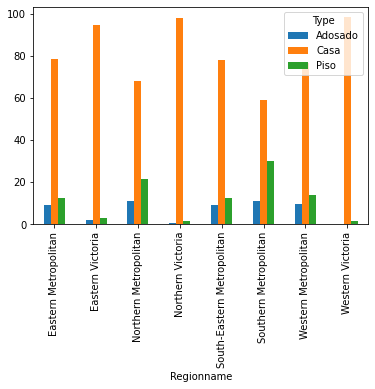

In [23]:
plot = pd.crosstab(index=Variables_cualitativas['Regionname'],
            columns=Variables_cualitativas['Type']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

En el grafico anterior observamos que  casi todos los tipos de casas que corresponden con piso en encuentran en las zonas centrales de la ciudad.

In [24]:
pd.crosstab(index=Variables_cualitativas["Regionname"],columns=Variables_cualitativas["Method"],margins=True)# ver tiene setido comprarlas variables.  hacer graficas por variable
#Mirar como son los barrios caros,etc. 
# ver las proporciones de ventas entre  S y SA ( por ejemplo) en diferenctre regiones. 

Method,oferta_vendedor,otro,sin_precio,traspasada,vend,vend_ant,All
Regionname,,,,,,,
Eastern Metropolitan,408,53,357,677,2338,544,4377
Eastern Victoria,23,11,16,30,99,49,228
Northern Metropolitan,703,88,356,1271,5695,1444,9557
Northern Victoria,14,5,13,15,110,46,203
South-Eastern Metropolitan,99,38,98,263,980,261,1739
Southern Metropolitan,1369,109,562,1676,6699,1421,11836
Western Metropolitan,487,93,251,907,3753,1308,6799
Western Victoria,4,2,8,11,69,21,115
All,3107,399,1661,4850,19743,5094,34854


En esta tabla, se observa que las regiones  con as ventas siempre corresponden a las de la zonas metropolitanas. Esto es logico debido a que son la areas con mayor densidad de población. 

##  4.3 Selección de variables categóricas


La selección de variables la hemos relizado mediante dos  prespectivas la agrupación por similitud entre las variables y la correlación con el precio. 

### 4.3.1 Agrupación por similitud 

#### Variables relacionadas con la localización

Tras analizar las variables cualitativas podemos, obsevar que muchas de ellas se refieren a la localizacion del alojamiento. 

Tanto como "Suburb","Address","CouncilArea","Postcode" cuentan con un numero muy amplio de categorías por lo que complicaría el desarrollo del modelo. La variable "Regionname" cuenta con un número(8 categorías) más adecuado y puede ser usasda para relacionar la localización con el precio. 




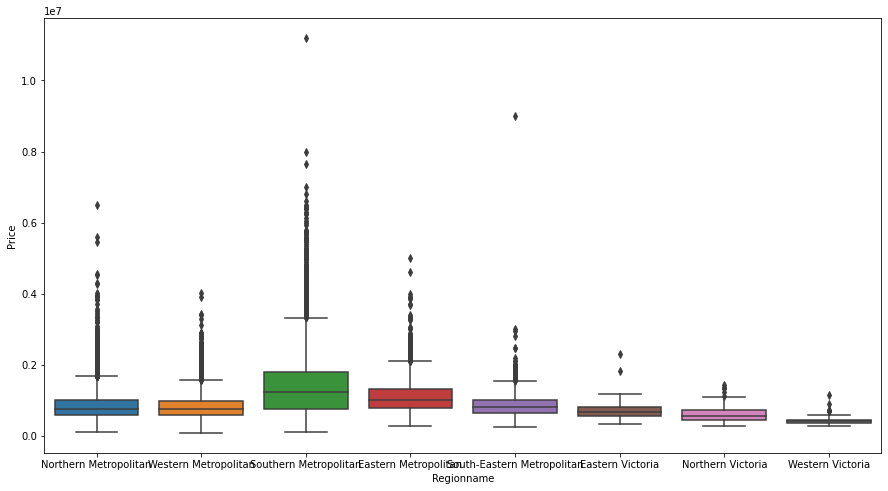

In [25]:

var = 'Regionname'
R = pd.concat([data['Price'], Variables_cualitativas[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=var, y="Price", data=R)
fig.axis();

Podemos observar que en las regiones metropolitanas el precio es ligeramente superior. Sobre todo en la "Southern Metropolitan".


Para poder decidir cual de ellas es  mejor utilizar en nuestra regresion lineal,  usamos la funcion get_dummies para transformarlas en varibles factoriales 

#### Variable "Type"

Analizamos la relacion entre la variables "Type" y la variables objetivo "Price"


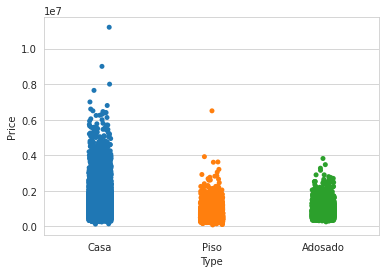

In [26]:

p =pd.DataFrame(data[["Price","Type"]])
p["Type"].replace({"br":"Dormitorio","h":"Casa","u":"Piso","t":"Adosado"}, inplace=True)
#b=Variables_cualitativas[["Type"]]

sns.set_style("whitegrid")               
ax=sns.stripplot(x="Type", y="Price", data=p)

Se observa que  la categoría "Casa"  no solo  prenseta  mayor  proponcion si no que además es mas  tiene unos precios mas altos. 

#### Variable "SellerG"

Analizamos la relacion entre la variables "SellerG" y la variable objetivo "Price"

[]

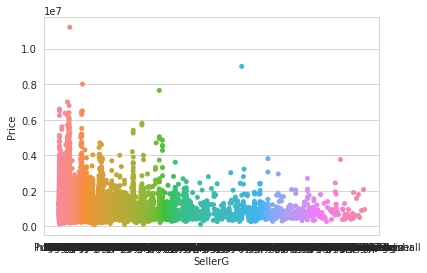

In [27]:
G =data[["Price","SellerG"]]
sns.set_style("whitegrid")
ax=sns.stripplot(x="SellerG", y="Price", data=G)
ax.plot()

La Agencia de Venta son también contiene un número muy alto de  categorías 388, a priori parece que algunos de los "SellerG", están mas relacionados con un precio  mas alto o mas bajo. 
 Sin embargo, estas agencias estan localizadas por zonas geograficas por lo tanto descartamos esta variable como posible para la primera creación de nuestro modelo. 

#### Variable "Method"

[]

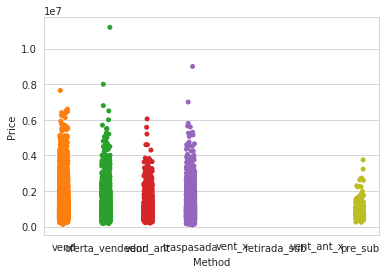

In [28]:
M=pd.DataFrame(data["Method"].replace({"S":"vend","SP":"vend_ant","PI":"traspasada","PN":"vent_ant_x","SN":"vent_x","NB":"sin_oferta","VB":"oferta_vendedor","W":"retirada_sub","SA":"pre_sub","SS":"pre_sub_x"}, inplace=True))
M=M.replace({"vent_ant_x":"sin_precio","vent_x":"sin_precio","sin_oferta":"sin_precio","pre_sub_x":"sin_precio","N/A":"sin_precio","pre_sub":"otro","retirada_sub":"otro"})
M =data[["Price","Method"]]
#fig, (ax1) = plot.subplots(1,figsize=(12,6)
sns.set_style("whitegrid")
ax=sns.stripplot(x="Method", y="Price", data=M,)
ax.plot()

#### Variable "Date"

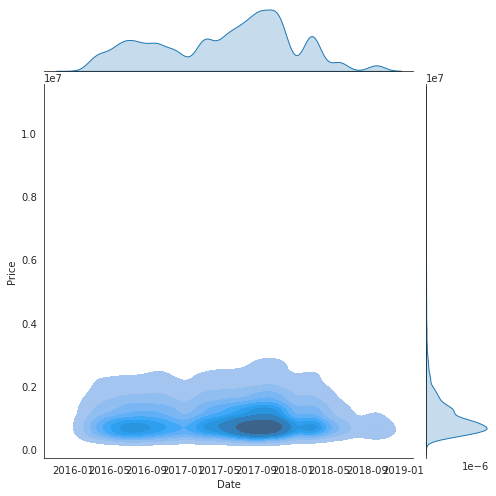

In [29]:
G =data[["Price","Date"]]
G=G.sort_values('Date',ascending=False)
with sns.axes_style("white"):
    sns.jointplot(x="Date",y="Price", data=G, kind="kde",height=7,fill=True)


### 4.4.2 Correlación de variables categóricas 

Observamos la corelación del cada una de las variables categóricas con el precio. PAra ellos hemos transformado las variables cualitativas en cuantitativas, creando variables dummies. 

In [33]:
Variables_cualitativas["Price"]=data["Price"]
#Mantenemos todas la categorias de todas las variables para poder analizarlas por separado
Variables_cualitativas_T=pd.get_dummies(Variables_cualitativas,columns = ["Regionname"])
Variables_cualitativas_T=pd.get_dummies(Variables_cualitativas_T,columns = ["Type"])
Variables_cualitativas_T=pd.get_dummies(Variables_cualitativas_T,columns = ["Date"])
Variables_cualitativas_T=pd.get_dummies(Variables_cualitativas_T,columns = ["Method"])
Variables_cualitativas_T.head()


,Suburb,Address,SellerG,CouncilArea,Postcode,Price,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,...,Date_8/07/2017,Date_8/10/2016,Date_9/09/2017,Date_9/12/2017,Method_oferta_vendedor,Method_otro,Method_sin_precio,Method_traspasada,Method_vend,Method_vend_ant
0,Abbotsford,68 Studley St,Jellis,Yarra City Council,3067.0,NaN,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,Abbotsford,85 Turner St,Biggin,Yarra City Council,3067.0,1480000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Abbotsford,25 Bloomburg St,Biggin,Yarra City Council,3067.0,1035000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,Abbotsford,18/659 Victoria St,Rounds,Yarra City Council,3067.0,NaN,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,Abbotsford,5 Charles St,Biggin,Yarra City Council,3067.0,1465000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1



### Regionname 

In [34]:

f=Variables_cualitativas_T[["Price","Regionname_Eastern Victoria"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price                          1.000000
Regionname_Eastern Victoria   -0.040992
Name: Price, dtype: float64

In [35]:
f=Variables_cualitativas_T[["Price","Regionname_Northern Metropolitan"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price                               1.000000
Regionname_Northern Metropolitan   -0.187367
Name: Price, dtype: float64

In [36]:
f=Variables_cualitativas_T[["Price","Regionname_Northern Victoria"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price                           1.000000
Regionname_Northern Victoria   -0.052621
Name: Price, dtype: float64

In [37]:
f=Variables_cualitativas_T[["Price","Regionname_South-Eastern Metropolitan"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price                                    1.000000
Regionname_South-Eastern Metropolitan   -0.061181
Name: Price, dtype: float64

In [38]:
f=Variables_cualitativas_T[["Price","Regionname_Southern Metropolitan"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price                               1.000000
Regionname_Southern Metropolitan    0.363694
Name: Price, dtype: float64

In [39]:
f=Variables_cualitativas_T[["Price","Regionname_Western Metropolitan"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price                              1.000000
Regionname_Western Metropolitan   -0.172605
Name: Price, dtype: float64

In [40]:
f=Variables_cualitativas_T[["Price","Regionname_Western Victoria"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price                          1.000000
Regionname_Western Victoria   -0.057248
Name: Price, dtype: float64

In [41]:
f=Variables_cualitativas_T[["Price","Regionname_Eastern Metropolitan"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price                              1.00000
Regionname_Eastern Metropolitan    0.03372
Name: Price, dtype: float64

### Type


In [42]:
f=Variables_cualitativas_T[["Price","Type_Casa"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price        1.000000
Type_Casa    0.347299
Name: Price, dtype: float64

In [43]:
f=Variables_cualitativas_T[["Price","Type_Piso"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price        1.000000
Type_Piso   -0.346388
Name: Price, dtype: float64

In [44]:
f=Variables_cualitativas_T[["Price","Type_Adosado"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price           1.000000
Type_Adosado   -0.063657
Name: Price, dtype: float64

### Method 


In [45]:
f=Variables_cualitativas_T[["Price","Method_otro"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price          1.00000
Method_otro   -0.00884
Name: Price, dtype: float64

In [46]:
f=Variables_cualitativas_T[["Price","Method_sin_precio"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price                1.0
Method_sin_precio    NaN
Name: Price, dtype: float64

In [47]:
f=Variables_cualitativas_T[["Price","Method_traspasada"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price                1.000000
Method_traspasada    0.038881
Name: Price, dtype: float64

In [48]:
f=Variables_cualitativas_T[["Price","Method_vend"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price          1.000000
Method_vend    0.002691
Name: Price, dtype: float64

In [49]:
f=Variables_cualitativas_T[["Price","Method_vend_ant"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)

Price              1.000000
Method_vend_ant   -0.104156
Name: Price, dtype: float64

In [50]:
f=Variables_cualitativas_T[["Price","Method_oferta_vendedor"]]
corr_matrix=f.corr(method='pearson')         
corr_matrix["Price"].sort_values(ascending=False)


Price                     1.000000
Method_oferta_vendedor    0.074224
Name: Price, dtype: float64

En general, la correlación de las categorías con la variable precio es baja, pero cabe destacar "Type_Casa" y "Regionname_South-Eastern Metropolitan" ambas superiores a 0,3.

Selecionaremos por lo tanto las variables categóricas "Type", "Regionname" y " Method"

## 4.5 Transformación de variables categóricas 

Despues de la selección de variables vamos a proceder a transformarlas para su uso porterior en el modelo. 

In [51]:
Variables_cualitativas_T=pd.get_dummies(Variables_cualitativas,columns = ["Regionname"],drop_first= True)
Variables_cualitativas_T=pd.get_dummies(Variables_cualitativas_T,columns = ["Type"],drop_first= True)
Variables_cualitativas_T=pd.get_dummies(Variables_cualitativas_T,columns = ["Date"],drop_first= True)
Variables_cualitativas_T=pd.get_dummies(Variables_cualitativas_T,columns = ["Method"],drop_first= True)

In [52]:
Variables_cualitativas_T

,Suburb,Address,SellerG,CouncilArea,Postcode,Price,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,...,Date_8/04/2017,Date_8/07/2017,Date_8/10/2016,Date_9/09/2017,Date_9/12/2017,Method_otro,Method_sin_precio,Method_traspasada,Method_vend,Method_vend_ant
0,Abbotsford,68 Studley St,Jellis,Yarra City Council,3067.0,NaN,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Abbotsford,85 Turner St,Biggin,Yarra City Council,3067.0,1480000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Abbotsford,25 Bloomburg St,Biggin,Yarra City Council,3067.0,1035000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Abbotsford,18/659 Victoria St,Rounds,Yarra City Council,3067.0,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abbotsford,5 Charles St,Biggin,Yarra City Council,3067.0,1465000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,Jas,Maribyrnong City Council,3013.0,1480000.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34853,Yarraville,29A Murray St,Sweeney,Maribyrnong City Council,3013.0,888000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34854,Yarraville,147A Severn St,Jas,Maribyrnong City Council,3013.0,705000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34855,Yarraville,12/37 Stephen St,hockingstuart,Maribyrnong City Council,3013.0,1140000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
Variables_cualitativas_T.to_csv('precios_casas_cualitativas.csv', index=False)